In [89]:
from glob import glob
from astroquery.mast import Mast, Observations
import os
import shutil
import numpy as np
import json
import requests
import asdf
from asdf import fits_embed
from astropy import log
from astropy import wcs as fwcs
from astropy.io import ascii, fits
from astropy.utils.data import download_file
from astropy.visualization import simple_norm
from astropy.visualization import ImageNormalize, ManualInterval, LogStretch, LinearStretch
from astropy.wcs.utils import skycoord_to_pixel
from astropy.nddata import extract_array

import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table

from align_to_catalogs import *
import astropy.units as u

import align_to_catalogs
from jwst import assign_wcs#.util.update_fits_wcsinfo
from jwst.datamodels import ImageModel

from astropy.modeling import models
from astropy import coordinates as coord
from astropy import units as u
from gwcs import wcs
from gwcs import coordinate_frames as cf

import asdf


In [2]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

In [3]:
os.environ["CRDS_PATH"] = "/orange/adamginsburg/jwst/brick/crds/"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [4]:
files = glob("/orange/adamginsburg/jwst/cloudc/F405N/pipeline/*destreak.fits")
files

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcblong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00001_nrcblong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00002_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcblong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00001_nrcblong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00003_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00002_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00003_nrcalong_destre

In [85]:
im = files[0]
im_align = im.split('.')[0]+'_align.fits'
im_gwcs = im.split('.')[0]+'_gwcs.fits'
shutil.copy(im, im_align)
shutil.copy(im, im_gwcs)

'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcblong_destreak_gwcs.fits'

In [68]:
fa = asdf.open(im_align)
wcsobj = fa.tree['meta']['wcs']

In [88]:
fa.tree

{'asdf_library': {'author': 'The ASDF Developers',
  'homepage': 'http://github.com/asdf-format/asdf',
  'name': 'asdf',
  'version': '2.14.3'},
 'history': {'extensions': [{'extension_class': 'asdf.extension.BuiltinExtension',
    'software': {'name': 'asdf', 'version': '2.14.3'}},
   {'extension_class': 'asdf.extension._manifest.ManifestExtension',
    'extension_uri': 'asdf://asdf-format.org/core/extensions/core-1.5.0',
    'software': {'name': 'asdf-astropy', 'version': '0.3.0'}},
   {'extension_class': 'asdf.extension._manifest.ManifestExtension',
    'extension_uri': 'asdf://asdf-format.org/astronomy/gwcs/extensions/gwcs-1.0.0',
    'software': {'name': 'gwcs', 'version': '0.18.3'}},
   {'extension_class': 'asdf.extension._manifest.ManifestExtension',
    'extension_uri': 'asdf://asdf-format.org/astronomy/coordinates/extensions/coordinates-1.0.0',
    'software': {'name': 'asdf-astropy', 'version': '0.3.0'}},
   {'extension_class': 'asdf.extension._manifest.ManifestExtension',
  

In [69]:
print(wcsobj)

2023-09-15T15:51:08.423465:    From      Transform   
---------- --------------
  detector  CompoundModel
      v2v3 DVA_Correction
v2v3vacorr       v23tosky
     world           None


In [52]:
dist = wcsobj.get_transform('detector', 'v2v3')
dist

<CompoundModel(offset_0=-0.132, offset_1=-0.137, offset_2=1., offset_3=1., offset_4=-1024.5, offset_5=-1024.5, c0_0_7=0., c1_0_7=0.06285605, c2_0_7=-0.00000012, c3_0_7=0., c4_0_7=0., c5_0_7=-0., c0_1_7=-0., c0_2_7=0.0000001, c0_3_7=0., c0_4_7=0., c0_5_7=-0., c1_1_7=-0.00000074, c1_2_7=0., c1_3_7=-0., c1_4_7=0., c2_1_7=0., c2_2_7=0., c2_3_7=-0., c3_1_7=-0., c3_2_7=0., c4_1_7=-0., c0_0_8=0., c1_0_8=0.00008378, c2_0_8=0.00000031, c3_0_8=0., c4_0_8=0., c5_0_8=-0., c0_1_8=0.06315358, c0_2_8=-0.00000044, c0_3_8=0., c0_4_8=-0., c0_5_8=0., c1_1_8=-0.00000023, c1_2_8=0., c1_3_8=-0., c1_4_8=-0., c2_1_8=0., c2_2_8=0., c2_3_8=0., c3_1_8=-0., c3_2_8=-0., c4_1_8=-0., c0_0_10=0., c1_0_10=-0.99999987, c0_1_10=0.00051463, c0_0_11=0., c1_0_11=0.00051463, c0_1_11=0.99999987, offset_12=-89.38741167, offset_13=-491.35239433)>

In [53]:
wcsobj

<WCS(output_frame=world, input_frame=detector, forward_transform=Model: CompoundModel
Inputs: ('x0', 'x1')
Outputs: ('lon', 'lat')
Model set size: 1
Expression: [0] & [1] | [2] & [3] | [4] & [5] | [6] | [7] & [8] | [9] | [10] & [11] | [12] & [13] | [14] & [15] | [16] & [17] | [18] & [19] | [20] | [21] | [22]
Components: 
    [0]: <Shift(offset=-0.132)>

    [1]: <Shift(offset=-0.137)>

    [2]: <Shift(offset=1.)>

    [3]: <Shift(offset=1.)>

    [4]: <Shift(offset=-1024.5)>

    [5]: <Shift(offset=-1024.5)>

    [6]: <Mapping((0, 1, 0, 1))>

    [7]: <Polynomial2D(5, c0_0=0., c1_0=0.06285605, c2_0=-0.00000012, c3_0=0., c4_0=0., c5_0=-0., c0_1=-0., c0_2=0.0000001, c0_3=0., c0_4=0., c0_5=-0., c1_1=-0.00000074, c1_2=0., c1_3=-0., c1_4=0., c2_1=0., c2_2=0., c2_3=-0., c3_1=-0., c3_2=0., c4_1=-0.)>

    [8]: <Polynomial2D(5, c0_0=0., c1_0=0.00008378, c2_0=0.00000031, c3_0=0., c4_0=0., c5_0=-0., c0_1=0.06315358, c0_2=-0.00000044, c0_3=0., c0_4=-0., c0_5=0., c1_1=-0.00000023, c1_2=0., c1_3=-0

In [54]:
pixel_scale = np.sqrt(fits.getheader(im, ext=1)['PIXAR_A2']*u.arcsec**2)/u.pix
pixel_scale

<Quantity 0.06269025 arcsec / pix>

In [55]:
xshift = 7.95 * u.arcsec / pixel_scale
yshift = -0.3 * u.arcsec / pixel_scale

In [56]:
xshift

<Quantity 126.81398737 pix>

In [57]:
yshift

<Quantity -4.78543349 pix>

In [58]:
shift = models.Shift(xshift) & models.Shift(yshift)

In [59]:
shift

<CompoundModel(offset_0=126.81398737 pix, offset_1=-4.78543349 pix)>

In [ ]:
#wcsobj.insert_transform('world', shift, after=True)

In [60]:
wcsobj.available_frames

['detector', 'v2v3', 'v2v3vacorr', 'world']

In [61]:
wcsobj.input_frame

<Frame2D(name="detector", unit=(Unit("pix"), Unit("pix")), axes_names=('x', 'y'), axes_order=(0, 1))>

In [62]:
wcsobj.output_frame

<CelestialFrame(name="world", unit=(Unit("deg"), Unit("deg")), axes_names=('lon', 'lat'), axes_order=(0, 1), reference_frame=<ICRS Frame>)>

In [65]:
wcsobj(1, 2)

(266.6053037136666, -28.606766057100106)

In [70]:
im

'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcblong_destreak.fits'

In [82]:
ref_fits = fits.open(im)

In [84]:
align_fits_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 266.58278632853  -28.623092937712  
CRPIX : 1024.5  1024.5  
CD1_1 CD1_2  : -1.6940434486916e-06  -1.7463274901009e-05  
CD2_1 CD2_2  : -1.7378788023915e-05  1.6781818804158e-06  
NAXIS : 2048  2048

In [87]:
gwcs_fits = fits.open(im_gwcs)
gwcs_fits.info()

Filename: /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcblong_destreak_gwcs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     348   ()      
  1  SCI           1 ImageHDU       112   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (2048, 2048)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (2048, 2048)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (2048, 2048)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (2048, 2048)   float32   
  8  ASDF          1 BinTableHDU     11   1R x 1C   [24983B]   


2023-09-15 16:35:21,081 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-15T16:03:04.827' from MJD-BEG.
Set DATE-AVG to '2023-04-15T16:03:31.669' from MJD-AVG.
Set DATE-END to '2023-04-15T16:03:58.511' from MJD-END'.
  warnings.warn(

2023-09-15 16:35:21,090 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to  -134.315532 from OBSGEO-[XYZ].
Set OBSGEO-B to    -3.213224 from OBSGEO-[XYZ].
Set OBSGEO-H to 1299094589.651 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-09-15 16:35:21,107 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-15T16:03:04.827' from MJD-BEG.
Set DATE-AVG to '2023-04-15T16:03:31.669' from MJD-AVG.
Set DATE-END to '2023-04-15T16:03:58.511' from MJD-END'.
  

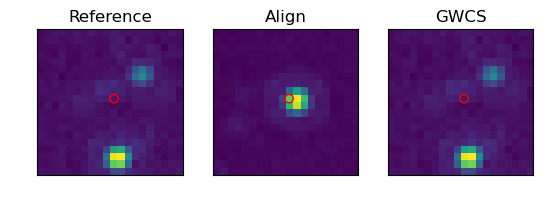

In [99]:
#01_08201_00002_nrcbl
star_location = SkyCoord('17:46:15.2083797761','-28:38:06.0376993433',unit=(u.hourangle,u.deg))
#star_location2 = SkyCoord('17:46:20.7437062304','-28:36:47.6472525487',unit=(u.hourangle,u.deg))
#star_location3 = SkyCoord('17:46:22.0306124391','-28:37:54.1817578554',unit=(u.hourangle,u.deg))

shutil.copy(im, im_align)
shutil.copy(im, im_gwcs)
#align_image = imfile#glob.glob('mastDownload/JWST/*long*/*cal.fits')[0]
align_fits = fits.open(im_align)
align_fits_wcs = fwcs.WCS(fits.getheader(im_align, ext=1))
align_fits['SCI',1].header['CRPIX1']+=(7.9*u.arcsec/pixel_scale).value
align_fits['SCI',1].header['CRPIX2']+=(-0.3*u.arcsec/pixel_scale).value
align_fits.writeto(im_align, overwrite=True)

gwcs_fits = fits.open(im_gwcs)
fa = asdf.open(im_gwcs)
xshift = 7.95 * u.arcsec / pixel_scale
yshift = -0.3 * u.arcsec / pixel_scale
shift = models.Shift(xshift) & models.Shift(yshift)
wcsobj.insert_transform('detector', shift, after=True)
tree = fa.tree
tree['meta']['wcs'] = wcsobj
fa = fits_embed.AsdfInFits(gwcs_fits, tree)
gwcs_fits.writeto(im_gwcs, overwrite=True)

ref_data = fits.open(im)['SCI',1].data
align_data = fits.open(im_align)['SCI',1].data
gwcs_data = fits.open(im_gwcs)['SCI',1].data

ref_fits = fits.open(im)
align_fits = fits.open(im_align)
gwcs_fits = fits.open(im_gwcs)

align_y,align_x = skycoord_to_pixel(star_location, fwcs.WCS(ref_fits['SCI', 1], ref_fits))

align_y2,align_x2 = skycoord_to_pixel(star_location, fwcs.WCS(align_fits['SCI', 1], align_fits))

align_y3,align_x3 = skycoord_to_pixel(star_location, fwcs.WCS(gwcs_fits['SCI', 1], gwcs_fits))


ref_y,ref_x = skycoord_to_pixel(star_location, fwcs.WCS(ref_fits['SCI', 1], ref_fits))
#align_y,align_x = skycoord_to_pixel(star_location, fwcs.WCS(align_fits['SCI',1], align_fits))

cutout_size=20.

ref_cutout = extract_array(ref_data,(cutout_size,cutout_size),(align_x,align_y))
norm1 = simple_norm(np.nan_to_num(ref_cutout), stretch='log', max_percent=99.95, log_a=1)#simple_norm(align_cutout,stretch='linear',min_cut=-.5,max_cut=3)

align_cutout = extract_array(align_data,(cutout_size,cutout_size),(align_x2,align_y2))
norm2 = simple_norm(np.nan_to_num(align_cutout), stretch='log', max_percent=99.95, log_a=1)

gwcs_cutout = extract_array(gwcs_data,(cutout_size,cutout_size),(align_x3,align_y3))
norm3 = simple_norm(np.nan_to_num(gwcs_cutout), stretch='log', max_percent=99.95, log_a=1)

fig,axes = plt.subplots(1,3)
axes[0].imshow(ref_cutout, origin='lower',
                      norm=norm1)
axes[0].scatter(cutout_size/2, cutout_size/2, edgecolor='r', facecolor='none')
axes[0].set_title('Reference')
axes[0].tick_params(labelcolor='none',axis='both',color='none')

axes[1].imshow(align_cutout, origin='lower',
                      norm=norm2)
axes[1].scatter(cutout_size/2, cutout_size/2, edgecolor='r', facecolor='none')
axes[1].set_title('Align')
axes[1].tick_params(labelcolor='none',axis='both',color='none')

axes[2].imshow(gwcs_cutout, origin='lower',
                      norm=norm3)
axes[2].scatter(cutout_size/2, cutout_size/2, edgecolor='r', facecolor='none')
axes[2].set_title('GWCS')
axes[2].tick_params(labelcolor='none',axis='both',color='none')

plt.show()


In [95]:
print(wcsobj)

2023-09-15T16:33:31.055431:    From      Transform   
---------- --------------
  detector  CompoundModel
      v2v3 DVA_Correction
v2v3vacorr       v23tosky
     world           None


In [100]:
shift

<CompoundModel(offset_0=126.81398737 pix, offset_1=-4.78543349 pix)>

In [101]:
wcsobj

<WCS(output_frame=world, input_frame=detector, forward_transform=Model: CompoundModel
Inputs: ('x0', 'x1')
Outputs: ('lon', 'lat')
Model set size: 1
Expression: [0] & [1] | [2] & [3] | [4] & [5] | [6] & [7] | [8] & [9] | [10] | [11] & [12] | [13] | [14] & [15] | [16] & [17] | [18] & [19] | [20] & [21] | [22] & [23] | [24] | [25] | [26]
Components: 
    [0]: <Shift(offset=126.81398737 pix)>

    [1]: <Shift(offset=-4.78543349 pix)>

    [2]: <Shift(offset=126.81398737 pix)>

    [3]: <Shift(offset=-4.78543349 pix)>

    [4]: <Shift(offset=-0.132)>

    [5]: <Shift(offset=-0.137)>

    [6]: <Shift(offset=1.)>

    [7]: <Shift(offset=1.)>

    [8]: <Shift(offset=-1024.5)>

    [9]: <Shift(offset=-1024.5)>

    [10]: <Mapping((0, 1, 0, 1))>

    [11]: <Polynomial2D(5, c0_0=0., c1_0=0.06285605, c2_0=-0.00000012, c3_0=0., c4_0=0., c5_0=-0., c0_1=-0., c0_2=0.0000001, c0_3=0., c0_4=0., c0_5=-0., c1_1=-0.00000074, c1_2=0., c1_3=-0., c1_4=0., c2_1=0., c2_2=0., c2_3=-0., c3_1=-0., c3_2=0., c4_1=-